# FIAP - DATA MINING & PRESCRIPTIVE ANALYSIS

Turma 87BI - 2023

Trabalho Final


# Enunciado
A partir de uma crescente taxa de turnover a empresa ACME solicita a sua área de cientistas que indique através de modelos adequados quais os colaboradores ela deve fazer sua ação de retenção. Foi disponibilizada uma base de seus colaboradores para análise.

# Questão 1

Utilize a base se dados HR_Abandono2022.

**a)Qual o objetivo desse estudo**

Identificar as características que levavam os colaboradores a sair da empresa (representado por “1” (True) na coluna “left”

**b)Porque nesse estudo é indicado utilizar técnicas supervisionadas de Classificação**
Porque temos uma coluna target conhecida, e essa coluna é uma classificação binária (1 ou 0) e não um valor quantitativo para regressão linear.   

**c)Classifique as variáveis: dependentes e independentes(preditoras)**

| Variável              | Tipo         |
|-----------------------|--------------|
| left                  | dependente   |
| satisfaction_level    | independente |
| last_evaluation       | independente |
| average_montly_hours  | independente |
| time_spend_company    | independente |
| Work_accident         | independente |
| promotion_last_5years | independente |
| salary                | independente |
| num_project           | independente |
| depto                 | independente

# Questão 2
Faça uma análise descritiva de todas as variáveis com a variável ‘target” separada em dois blocos:

### Preparando o Dataset

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('HR_Abandono_2022(1).csv', delimiter=';')
df.head()

,id,left,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,num_project,depto
0,1,1,"0,38","0,53",157,3,0,0,low,2,sales
1,2,1,"0,8","0,86",262,6,0,0,medium,5,sales
2,3,1,"0,11","0,88",272,4,0,0,medium,6,sales
3,4,1,"0,72","0,87",223,5,0,0,low,5,sales
4,5,1,"0,37","0,52",159,3,0,0,low,2,sales


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     15000 non-null  int64 
 1   left                   15000 non-null  int64 
 2   satisfaction_level     15000 non-null  object
 3   last_evaluation        15000 non-null  object
 4   average_montly_hours   15000 non-null  int64 
 5   time_spend_company     15000 non-null  int64 
 6   Work_accident          15000 non-null  int64 
 7   promotion_last_5years  15000 non-null  int64 
 8   salary                 15000 non-null  object
 9   num_project            15000 non-null  int64 
 10  depto                  15000 non-null  object
dtypes: int64(7), object(4)
memory usage: 1.3+ MB


In [4]:
df.describe()

,id,left,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,num_project
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,0.238533,201.187400,3.407067,0.144600,0.021800,3.785867
std,4330.271354,0.426201,50.887422,1.176091,0.351709,0.146035,1.194589
min,1.000000,0.000000,96.000000,2.000000,0.000000,0.000000,2.000000
25%,3750.750000,0.000000,156.000000,3.000000,0.000000,0.000000,3.000000
50%,7500.500000,0.000000,200.000000,3.000000,0.000000,0.000000,4.000000
75%,11250.250000,0.000000,245.000000,4.000000,0.000000,0.000000,5.000000
max,15000.000000,1.000000,808.000000,6.000000,1.000000,1.000000,6.000000


Precisamos transformar a coluna 'satisfaction level" e "last evaluation" em float

In [5]:
##substituir vírgula por ponto
df['satisfaction_level']=df['satisfaction_level'].str.replace(',','.')
df['last_evaluation']=df['last_evaluation'].str.replace(',','.')

## transformando em float

df[['satisfaction_level','last_evaluation']]=df[['satisfaction_level','last_evaluation']].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     15000 non-null  int64  
 1   left                   15000 non-null  int64  
 2   satisfaction_level     15000 non-null  float64
 3   last_evaluation        15000 non-null  float64
 4   average_montly_hours   15000 non-null  int64  
 5   time_spend_company     15000 non-null  int64  
 6   Work_accident          15000 non-null  int64  
 7   promotion_last_5years  15000 non-null  int64  
 8   salary                 15000 non-null  object 
 9   num_project            15000 non-null  int64  
 10  depto                  15000 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [7]:
df.describe()

,id,left,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,num_project
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,0.238533,0.616725,0.716089,201.187400,3.407067,0.144600,0.021800,3.785867
std,4330.271354,0.426201,0.243012,0.171170,50.887422,1.176091,0.351709,0.146035,1.194589
min,1.000000,0.000000,0.100000,0.360000,96.000000,2.000000,0.000000,0.000000,2.000000
25%,3750.750000,0.000000,0.440000,0.560000,156.000000,3.000000,0.000000,0.000000,3.000000
50%,7500.500000,0.000000,0.640000,0.720000,200.000000,3.000000,0.000000,0.000000,4.000000
75%,11250.250000,0.000000,0.820000,0.870000,245.000000,4.000000,0.000000,0.000000,5.000000
max,15000.000000,1.000000,1.000000,1.000000,808.000000,6.000000,1.000000,1.000000,6.000000


### a) Variáveis Preditoras numéricas

In [8]:
df_num = df[
    ['left','satisfaction_level', 
    'last_evaluation', 'average_montly_hours', 'time_spend_company','num_project']
    ]
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   left                  15000 non-null  int64  
 1   satisfaction_level    15000 non-null  float64
 2   last_evaluation       15000 non-null  float64
 3   average_montly_hours  15000 non-null  int64  
 4   time_spend_company    15000 non-null  int64  
 5   num_project           15000 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 703.3 KB


In [9]:
df_num.head()

,left,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,num_project
0,1,0.38,0.53,157,3,2
1,1,0.80,0.86,262,6,5
2,1,0.11,0.88,272,4,6
3,1,0.72,0.87,223,5,5
4,1,0.37,0.52,159,3,2


#### Satisfaction_level

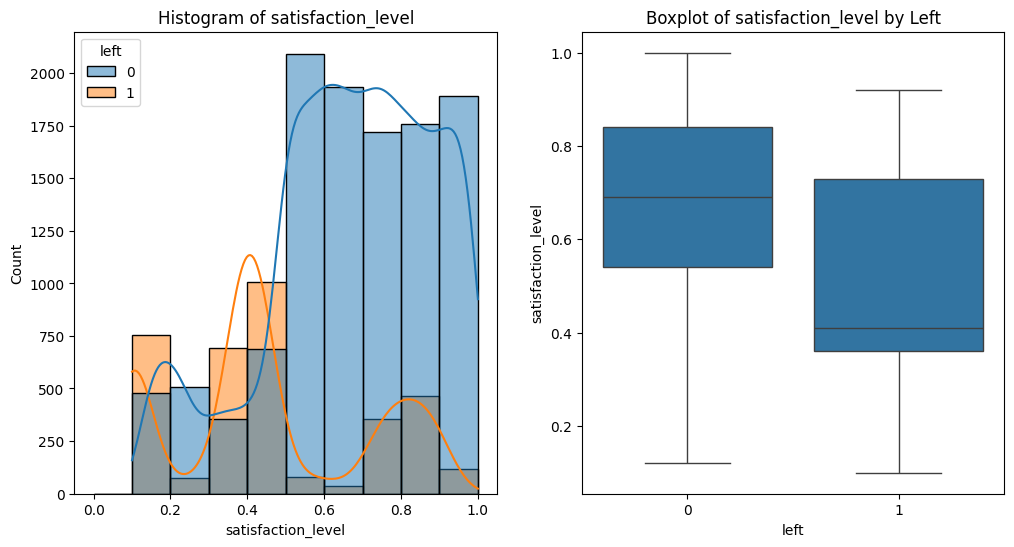

In [10]:
## primeiro vamos avaliar a distribuição e relação entre satisfaction level e "Left"
parameter = 'satisfaction_level'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sb.histplot(df_num, x = parameter, ax = axes[0], hue = 'left', kde = True, binwidth = 0.1, binrange = [0,1])
axes[0].set_title('Histogram of {}'.format(parameter))

sb.boxplot(df_num, x='left', y = parameter, ax = axes[1])
axes[1].set_title('Boxplot of {} by Left'.format(parameter))

plt.show()

In [11]:
## Claramente vemos uma forte correlação entre o nível de satisfação do funcionário e se ele saiu ou não 
##(distribuição e mediana do grupo "left" é extremamente inferior

#### Last_evaluation

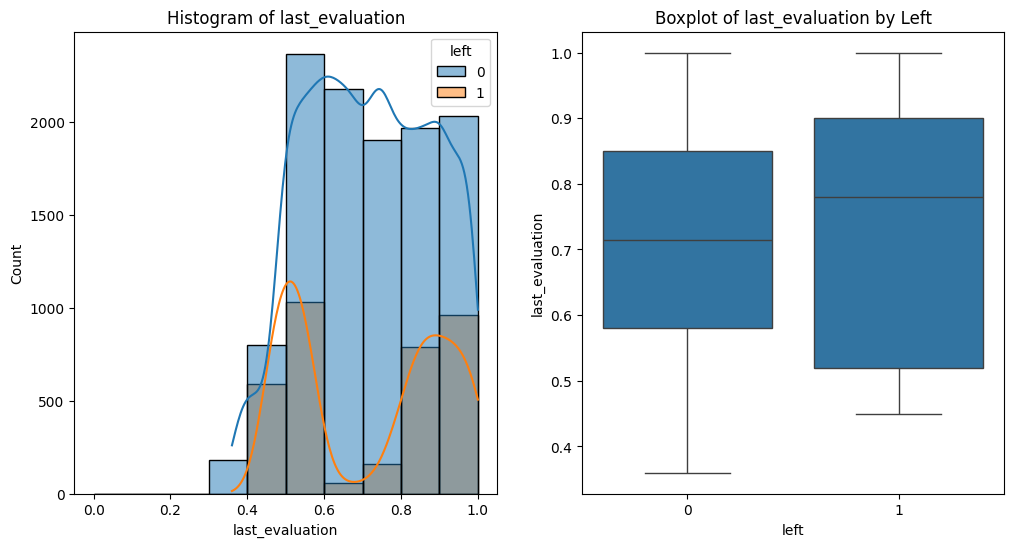

In [12]:
## agpra vamos avaliar a distribuição e relação entre last_evaluation e "Left"
parameter = 'last_evaluation'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sb.histplot(df_num, x = parameter, ax = axes[0], hue = 'left', kde = True, binwidth=0.1, binrange = [0,1])
axes[0].set_title('Histogram of {}'.format(parameter))

sb.boxplot(df_num, x='left', y = parameter, ax = axes[1])
axes[1].set_title('Boxplot of {} by Left'.format(parameter))

plt.show()

In [13]:
##esse é um caso interessante. Apesar de das medias e medianas não estarem muito diferentes, 
##a distribuição do parâmetro daqueles que saíram está muito concentrada em notas abaixo de 0.6 ou acima de 0.8
##Indicando que funcionários "mediano" não tem interesse de sair da empresa. 
##Enquanto os de baixa performance ou altíssima performance podem se interessar mais por sair

#### average_montly_hours

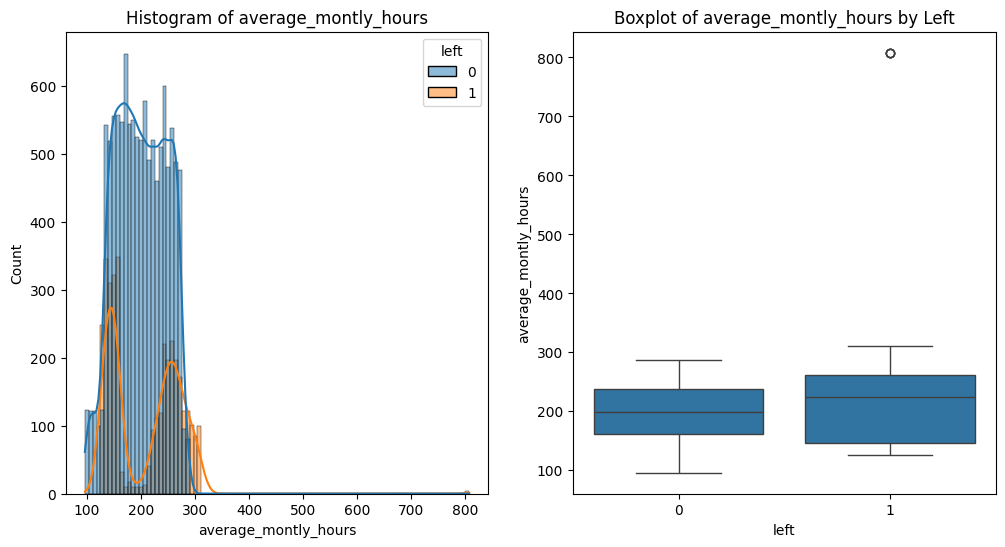

In [14]:
## agpra vamos avaliar a distribuição e relação entre average_montly_hours e "Left"
parameter = 'average_montly_hours'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sb.histplot(df_num, x = parameter, ax = axes[0], hue = 'left', kde = True)
axes[0].set_title('Histogram of {}'.format(parameter))

sb.boxplot(df_num, x='left', y = parameter, ax = axes[1])
axes[1].set_title('Boxplot of {} by Left'.format(parameter))

plt.show()

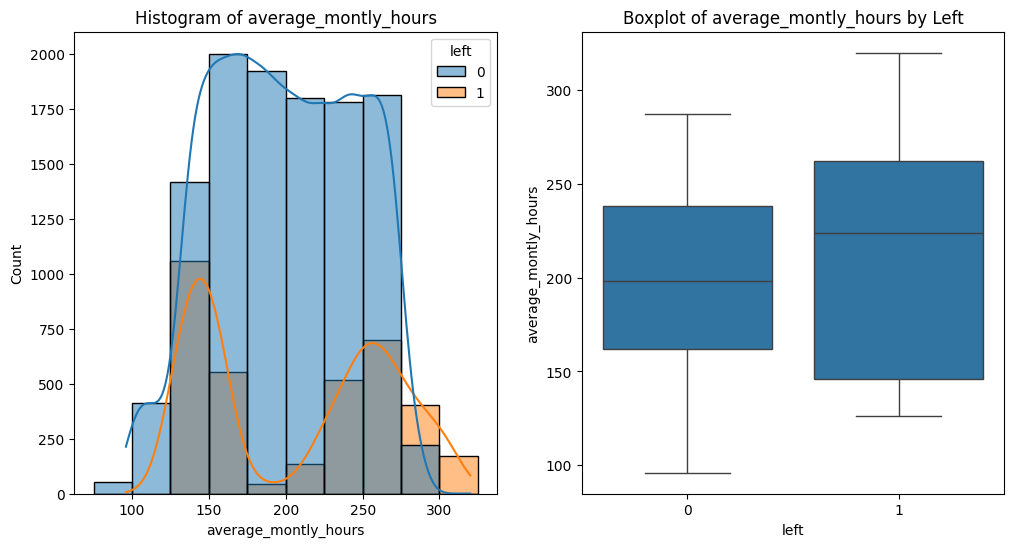

In [15]:
##Temos um outlier nesta distribuição. Vamos truncar o valor em 320 que é próximo do máximo natural da distribuição

df_num.loc[df_num['average_montly_hours']>=320, 'average_montly_hours'] = 320


## agora repetimos nosso plot para avaliação 
parameter = 'average_montly_hours'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sb.histplot(df_num, x = parameter, ax = axes[0], hue = 'left', kde = True, binwidth = 25, binrange = [75,325])
axes[0].set_title('Histogram of {}'.format(parameter))

sb.boxplot(df_num, x='left', y = parameter, ax = axes[1])
axes[1].set_title('Boxplot of {} by Left'.format(parameter))

plt.show()

In [16]:
##Similar ao caso anterior, vemos qu temos pouca saída dos funcionários no "centro" da distribuçião.
##Apesar disso a média das horas mensais é maior nos que decidiram sair

#### Time_spend_company

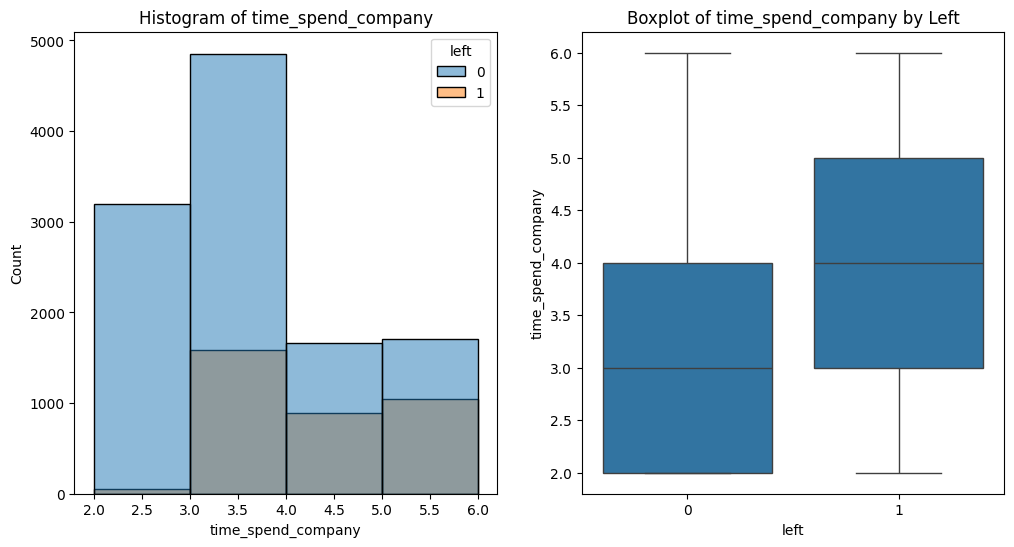

In [17]:
## agpra vamos avaliar a distribuição e relação entre time_spend_company e "Left"
parameter = 'time_spend_company'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sb.histplot(df_num, x = parameter, ax = axes[0], hue = 'left', binwidth=1)
axes[0].set_title('Histogram of {}'.format(parameter))

sb.boxplot(df_num, x='left', y = parameter, ax = axes[1])
axes[1].set_title('Boxplot of {} by Left'.format(parameter))

plt.show()

In [18]:
#Forte correlação. Funcionários tendem a começar a sair após seus 3 anos de empresa

#### num_project

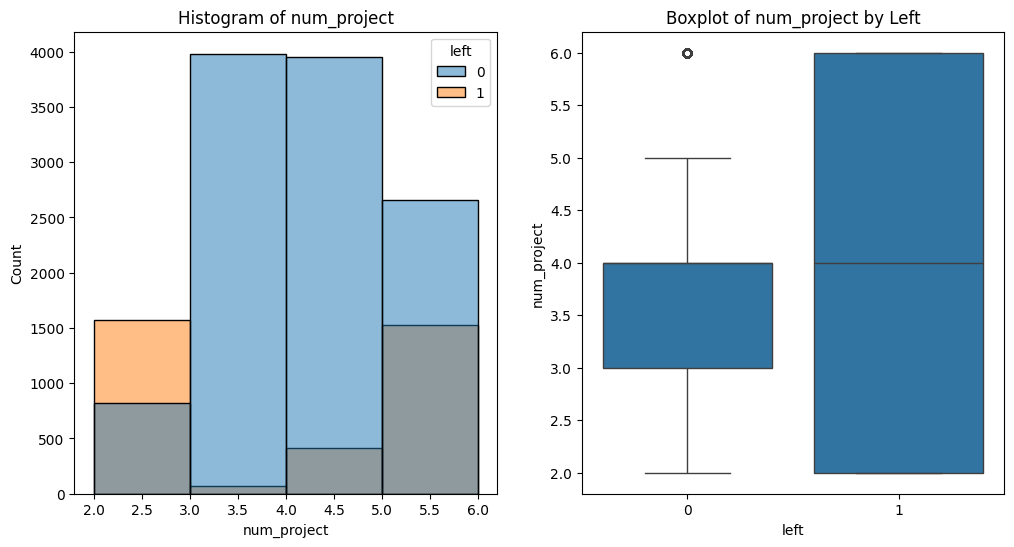

In [19]:
## agpra vamos avaliar a distribuição e relação entre num_project e "Left"
parameter = 'num_project'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sb.histplot(df_num, x = parameter, ax = axes[0], hue = 'left', binwidth=1)
axes[0].set_title('Histogram of {}'.format(parameter))

sb.boxplot(df_num, x='left', y = parameter, ax = axes[1])
axes[1].set_title('Boxplot of {} by Left'.format(parameter))

plt.show()

In [20]:
##Novamente uma concentração dos que ficam no centro, e uma concentração dos que saem nas extremidades
##Pode significar que funcionários com menos de 3 projetos não se sentem desafiados o sfuciente
##Enquanto funcionarios com mais de 5 projetos podem se sentir sobrecarregados e tendem a sair

### b) Variáveis Preditoras Categóricas

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     15000 non-null  int64  
 1   left                   15000 non-null  int64  
 2   satisfaction_level     15000 non-null  float64
 3   last_evaluation        15000 non-null  float64
 4   average_montly_hours   15000 non-null  int64  
 5   time_spend_company     15000 non-null  int64  
 6   Work_accident          15000 non-null  int64  
 7   promotion_last_5years  15000 non-null  int64  
 8   salary                 15000 non-null  object 
 9   num_project            15000 non-null  int64  
 10  depto                  15000 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [22]:
df_cat = df[
    ['left','Work_accident', 
    'promotion_last_5years', 'salary', 'depto']
    ]
df_cat.head()

,left,Work_accident,promotion_last_5years,salary,depto
0,1,0,0,low,sales
1,1,0,0,medium,sales
2,1,0,0,medium,sales
3,1,0,0,low,sales
4,1,0,0,low,sales


#### Work_accident

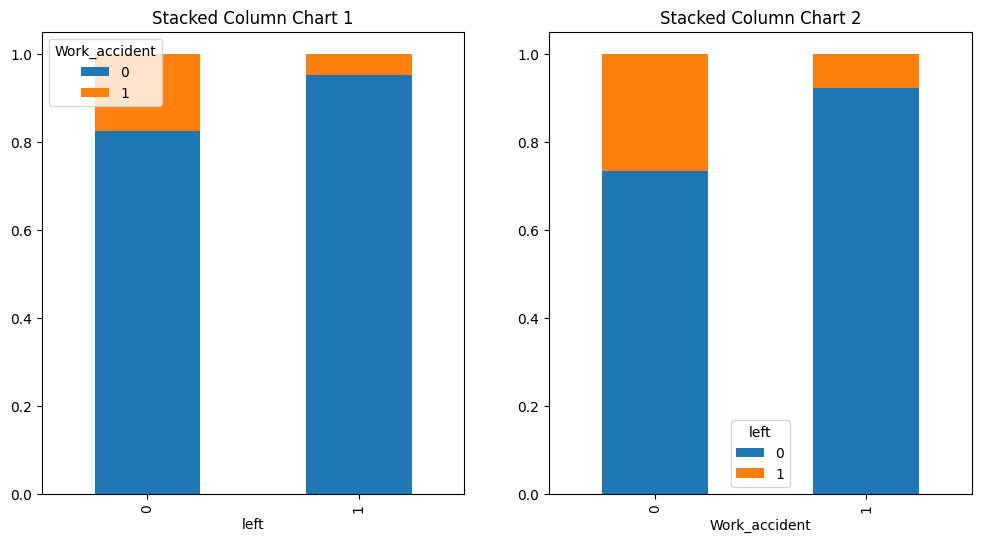

In [23]:
var = 'Work_accident'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

evaluation1 = pd.crosstab(df_cat['left'],df_cat[var])
evaluation1.div(evaluation1.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[0])
axes[0].set_title('Stacked Column Chart 1')

evaluation1 = pd.crosstab(df_cat[var],df_cat['left'])
evaluation1.div(evaluation1.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[1])
axes[1].set_title('Stacked Column Chart 2')

plt.show()

In [24]:
# Aparentemente ter um acidente de trabalho aumenta a chance do funcionário ficar na empresa
# isso pode ser devido a benefícios dados para os funcionários acidentados ou acordos ocm a empresa

#### promotion_last_5years

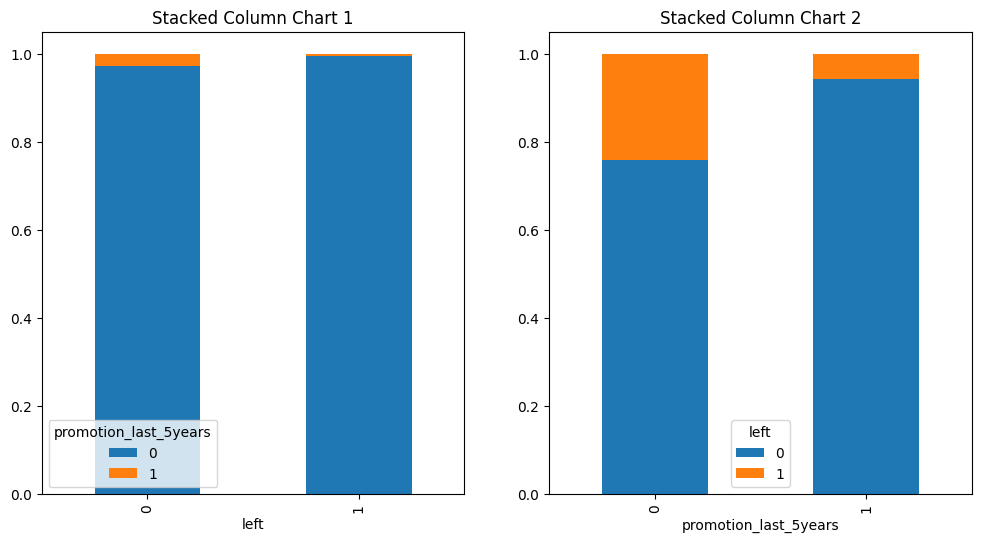

In [25]:
var = 'promotion_last_5years'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

evaluation1 = pd.crosstab(df_cat['left'],df_cat[var])
evaluation1.div(evaluation1.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[0])
axes[0].set_title('Stacked Column Chart 1')

evaluation1 = pd.crosstab(df_cat[var],df_cat['left'])
evaluation1.div(evaluation1.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[1])
axes[1].set_title('Stacked Column Chart 2')

plt.show()

In [26]:
## ter recebido um aumento nos últimos 5 anos reduz consideravelmente a chance do funcionário sair

#### Salary

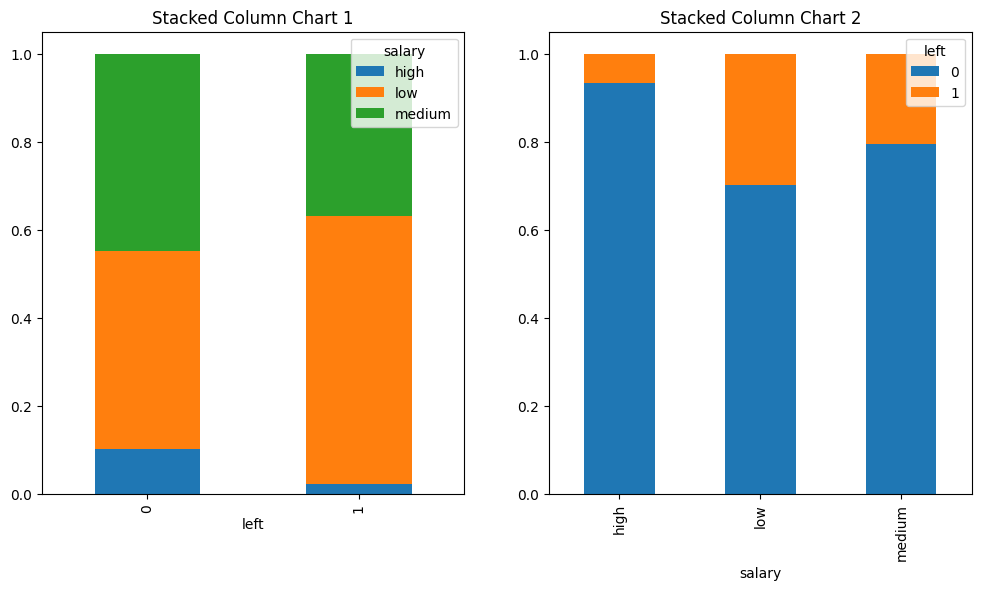

In [27]:
var = 'salary'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

evaluation1 = pd.crosstab(df_cat['left'],df_cat[var])
evaluation1.div(evaluation1.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[0])
axes[0].set_title('Stacked Column Chart 1')

evaluation1 = pd.crosstab(df_cat[var],df_cat['left'])
evaluation1.div(evaluation1.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[1])
axes[1].set_title('Stacked Column Chart 2')

plt.show()

In [28]:
### Mais da metade dos funcionários que deixam a empresa estão na categoria "low salary"

#### depto

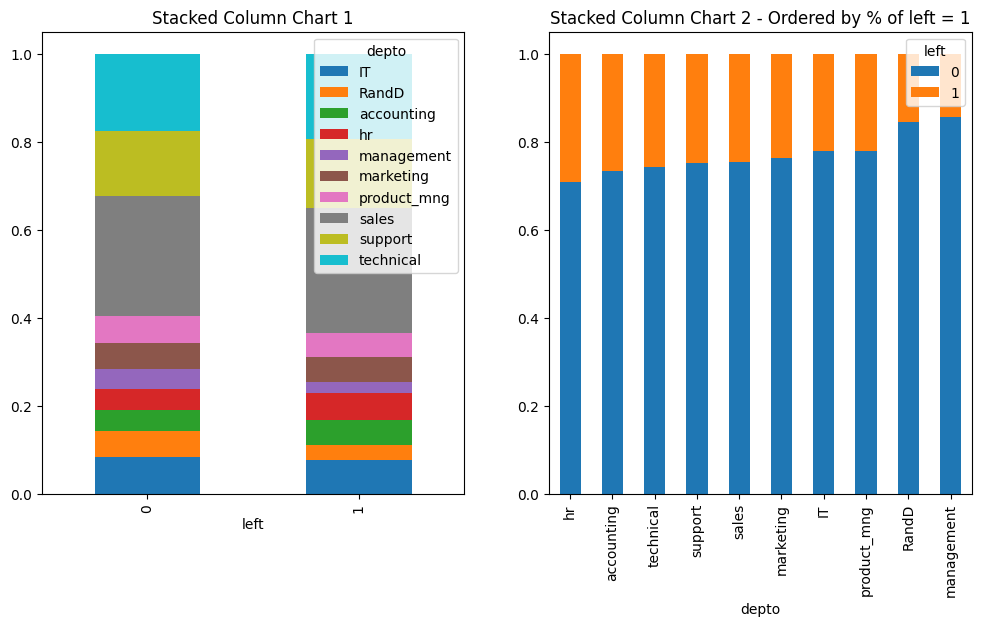

In [29]:
var = 'depto'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Stacked Column Chart 1
evaluation1 = pd.crosstab(df_cat['left'], df_cat[var])
evaluation1.div(evaluation1.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[0])
axes[0].set_title('Stacked Column Chart 1')

# Stacked Column Chart 2 with ordering by percentage of left = 1
evaluation2 = pd.crosstab(df_cat[var], df_cat['left'])
# avaliamos a porcentagem dentro da categoria que saiu
percentage_left_1 = evaluation2[1] / evaluation2.sum(1) * 100
# Sort the DataFrame by the percentage in descending order
evaluation2_sorted = evaluation2.loc[percentage_left_1.sort_values(ascending=False).index]
evaluation2_sorted.div(evaluation2_sorted.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[1])
axes[1].set_title('Stacked Column Chart 2 - Ordered by % of left = 1')

plt.show()



In [30]:
#dessa maneira vemos que funcionário de hr e accounting possuem maiores chances de deixar a empresa que RandD e management

## c) Transformação de Variáveis

Qual variável precisa ser feita alguma transformação. Quais? Coloque tabelas ou gráficos dessas novas variáveis transformadas.

### c.1) Variáveis numéricas - Normalização

In [31]:
df.describe()

,id,left,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,num_project
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,0.238533,0.616725,0.716089,201.187400,3.407067,0.144600,0.021800,3.785867
std,4330.271354,0.426201,0.243012,0.171170,50.887422,1.176091,0.351709,0.146035,1.194589
min,1.000000,0.000000,0.100000,0.360000,96.000000,2.000000,0.000000,0.000000,2.000000
25%,3750.750000,0.000000,0.440000,0.560000,156.000000,3.000000,0.000000,0.000000,3.000000
50%,7500.500000,0.000000,0.640000,0.720000,200.000000,3.000000,0.000000,0.000000,4.000000
75%,11250.250000,0.000000,0.820000,0.870000,245.000000,4.000000,0.000000,0.000000,5.000000
max,15000.000000,1.000000,1.000000,1.000000,808.000000,6.000000,1.000000,1.000000,6.000000


In [32]:
#Eliminando o outlier do df, como vimos no item anterior

df.loc[df['average_montly_hours']>=320, 'average_montly_hours'] = 320
df.describe()

,id,left,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,num_project
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,0.238533,0.616725,0.716089,201.057267,3.407067,0.144600,0.021800,3.785867
std,4330.271354,0.426201,0.243012,0.171170,49.950760,1.176091,0.351709,0.146035,1.194589
min,1.000000,0.000000,0.100000,0.360000,96.000000,2.000000,0.000000,0.000000,2.000000
25%,3750.750000,0.000000,0.440000,0.560000,156.000000,3.000000,0.000000,0.000000,3.000000
50%,7500.500000,0.000000,0.640000,0.720000,200.000000,3.000000,0.000000,0.000000,4.000000
75%,11250.250000,0.000000,0.820000,0.870000,245.000000,4.000000,0.000000,0.000000,5.000000
max,15000.000000,1.000000,1.000000,1.000000,320.000000,6.000000,1.000000,1.000000,6.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     15000 non-null  int64  
 1   left                   15000 non-null  int64  
 2   satisfaction_level     15000 non-null  float64
 3   last_evaluation        15000 non-null  float64
 4   average_montly_hours   15000 non-null  int64  
 5   time_spend_company     15000 non-null  int64  
 6   Work_accident          15000 non-null  int64  
 7   promotion_last_5years  15000 non-null  int64  
 8   salary                 15000 non-null  object 
 9   num_project            15000 non-null  int64  
 10  depto                  15000 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [34]:
# temos que normalizar as colunas average_montly_hours, time_spend_company e num_project
from sklearn.preprocessing import MinMaxScaler


MinMax = MinMaxScaler()
df2 = pd.DataFrame(df,columns =['average_montly_hours', 'time_spend_company', 'num_project'])
df2 = MinMax.fit_transform(df2)
df2 = pd.DataFrame(df2,columns =['average_montly_hours', 'time_spend_company', 'num_project'])
df2.describe()

,average_montly_hours,time_spend_company,num_project
count,15000.000000,15000.000000,15000.000000
mean,0.469006,0.351767,0.446467
std,0.222994,0.294023,0.298647
min,0.000000,0.000000,0.000000
25%,0.267857,0.250000,0.250000
50%,0.464286,0.250000,0.500000
75%,0.665179,0.500000,0.750000
max,1.000000,1.000000,1.000000


In [35]:
df_norm = df
df_norm[['average_montly_hours', 'time_spend_company', 'num_project']] = df2[['average_montly_hours', 'time_spend_company', 'num_project']]
df_norm.describe()

,id,left,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,num_project
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,0.238533,0.616725,0.716089,0.469006,0.351767,0.144600,0.021800,0.446467
std,4330.271354,0.426201,0.243012,0.171170,0.222994,0.294023,0.351709,0.146035,0.298647
min,1.000000,0.000000,0.100000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3750.750000,0.000000,0.440000,0.560000,0.267857,0.250000,0.000000,0.000000,0.250000
50%,7500.500000,0.000000,0.640000,0.720000,0.464286,0.250000,0.000000,0.000000,0.500000
75%,11250.250000,0.000000,0.820000,0.870000,0.665179,0.500000,0.000000,0.000000,0.750000
max,15000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### c.2) Variáveis categóricas - Dummys

In [36]:
#lembrando de nossas variáveis categóricas
df_cat.head()

,left,Work_accident,promotion_last_5years,salary,depto
0,1,0,0,low,sales
1,1,0,0,medium,sales
2,1,0,0,medium,sales
3,1,0,0,low,sales
4,1,0,0,low,sales


In [37]:
#Vamos criar dummies para a coluna "salary" e depto
salary_dummies = pd.get_dummies(
    df_norm['salary'],
    drop_first=True, #dropping the first category
    prefix='salary' #putting a prefix
)

salary_dummies = salary_dummies.astype(int)
salary_dummies

,salary_low,salary_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14995,1,0
14996,1,0
14997,1,0
14998,1,0


In [38]:

depto_dummies = pd.get_dummies(
    df_norm['depto'],
    drop_first=True, #dropping the first category
    prefix='depto' #putting a prefix
)

depto_dummies = depto_dummies.astype(int)
depto_dummies

,depto_RandD,depto_accounting,depto_hr,depto_management,depto_marketing,depto_product_mng,depto_sales,depto_support,depto_technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,1,0
14998,0,0,0,0,0,0,0,1,0


In [39]:
## adicionamos essas colunas na nossa tabela original

df_norm_dummied = pd.concat([df_norm, depto_dummies,salary_dummies], axis=1)
df_norm_dummied

,id,left,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,num_project,...,depto_accounting,depto_hr,depto_management,depto_marketing,depto_product_mng,depto_sales,depto_support,depto_technical,salary_low,salary_medium
0,1,1,0.38,0.53,0.272321,0.25,0,0,low,0.00,...,0,0,0,0,0,1,0,0,1,0
1,2,1,0.80,0.86,0.741071,1.00,0,0,medium,0.75,...,0,0,0,0,0,1,0,0,0,1
2,3,1,0.11,0.88,0.785714,0.50,0,0,medium,1.00,...,0,0,0,0,0,1,0,0,0,1
3,4,1,0.72,0.87,0.566964,0.75,0,0,low,0.75,...,0,0,0,0,0,1,0,0,1,0
4,5,1,0.37,0.52,0.281250,0.25,0,0,low,0.00,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,1,0.37,0.48,0.285714,0.25,0,0,low,0.00,...,0,0,0,0,0,0,1,0,1,0
14996,14997,1,0.37,0.53,0.209821,0.25,0,0,low,0.00,...,0,0,0,0,0,0,1,0,1,0
14997,14998,1,0.11,0.96,0.821429,0.50,0,0,low,1.00,...,0,0,0,0,0,0,1,0,1,0
14998,14999,1,0.37,0.52,0.276786,0.25,0,0,low,0.00,...,0,0,0,0,0,0,1,0,1,0


In [40]:
## por fim, dropamos as colunas originais que geraram nossos dummies

df_train = df_norm_dummied.drop(['depto', 'salary'], axis = 1)
df_train.head()

,id,left,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,num_project,depto_RandD,depto_accounting,depto_hr,depto_management,depto_marketing,depto_product_mng,depto_sales,depto_support,depto_technical,salary_low,salary_medium
0,1,1,0.38,0.53,0.272321,0.25,0,0,0.00,0,0,0,0,0,0,1,0,0,1,0
1,2,1,0.80,0.86,0.741071,1.00,0,0,0.75,0,0,0,0,0,0,1,0,0,0,1
2,3,1,0.11,0.88,0.785714,0.50,0,0,1.00,0,0,0,0,0,0,1,0,0,0,1
3,4,1,0.72,0.87,0.566964,0.75,0,0,0.75,0,0,0,0,0,0,1,0,0,1,0
4,5,1,0.37,0.52,0.281250,0.25,0,0,0.00,0,0,0,0,0,0,1,0,0,1,0


# Questão 3

Uma etapa para começar usar os modelos é muito importante separar em amostras? Explique Por que e como separou essas amostras.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop('left',axis=1),df_train['left'],test_size=0.3, random_state=13)



In [42]:
X_train.drop('id', axis = 1,inplace = True)

# Questão 4

Utilizando Técnica de Classificação: Árvore de Decisão, Regressão Logística e mais dois outros algoritmos.  Mostre para cada algoritmo: 
   
- Explique sobre o algoritmo;
- Coloque os parâmetros utilizados;
- Qual o resultado obtido sobre variáveis preditoras, suas importâncias;
- Qual é o Acerto do Modelo? Qual a Matriz de Confusão? Qual o desempenho do modelo na base teste (Acurácia, Precision e Recall – Como interpretar esses resultados)
- Entre os algoritmos aplicados a essa empresa, qual você indicaria e coloque a explicação da escolha. 


## Arvore de Decisão

### Explicando o Algoritmo

--------- Escrever aqui a explicação

### Parâmetros

In [158]:

Classif_tree = DecisionTreeClassifier(
    random_state=10,
    max_depth = 3,                      ##Mais que isso gera um claro overfitting
    min_weight_fraction_leaf = 0.05,    ##Evitamos "folhas" com menos de 5% dos casos, evitando casos muito específicos
    min_impurity_decrease=0.01          ##Sem esse parâmetro decíamos um nível desnecessário, então geramos uma poda
    )


classif = Classif_tree.fit(X_train, y_train)


### Resultados e importâncias

In [159]:
## Checando a importância de cada coluna na árvore de decisão
df_features = pd.DataFrame(X_train.columns)

df_importances = pd.DataFrame(classif.feature_importances_)

importance = pd.concat(
    [df_features, df_importances],
    axis =1
)

importance = importance.set_axis(['Feature', 'Importance'], axis = 'columns').sort_values(by=['Importance'], ascending=False)

importance.head(10)

,Feature,Importance
0,satisfaction_level,0.563487
3,time_spend_company,0.190433
6,num_project,0.125373
1,last_evaluation,0.120707
11,depto_marketing,0.000000
16,salary_low,0.000000
15,depto_technical,0.000000
14,depto_support,0.000000
13,depto_sales,0.000000
12,depto_product_mng,0.000000


In [160]:
## Faz muito sentido que o parâmetro mais importante é o nível de satisfação do funcionário
##que resume se ele deseja ou não ficar na empresa

### Acerto do modelo e Matriz de Confusão


In [161]:
#treinando nosso modelo

y_pred_tree = classif.predict(X_train)

In [162]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_tree)
confusion_matrix

array([[7558,  423],
       [ 333, 2186]], dtype=int64)

In [191]:
report_tree = classification_report(y_train, y_pred_tree,digits=2)
print(report_tree)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7981
           1       0.84      0.87      0.85      2519

    accuracy                           0.93     10500
   macro avg       0.90      0.91      0.90     10500
weighted avg       0.93      0.93      0.93     10500



In [164]:
#Bons valores de precisão e acurácia. Mais que isso poderíamos considerar overfitting
##Vemos que para nossa previsão de "Left = 1", atingimos 84% de precisão
##O recall também tem um bom valor para evitarmos classificar algum funcionario erroneamente como Left=1

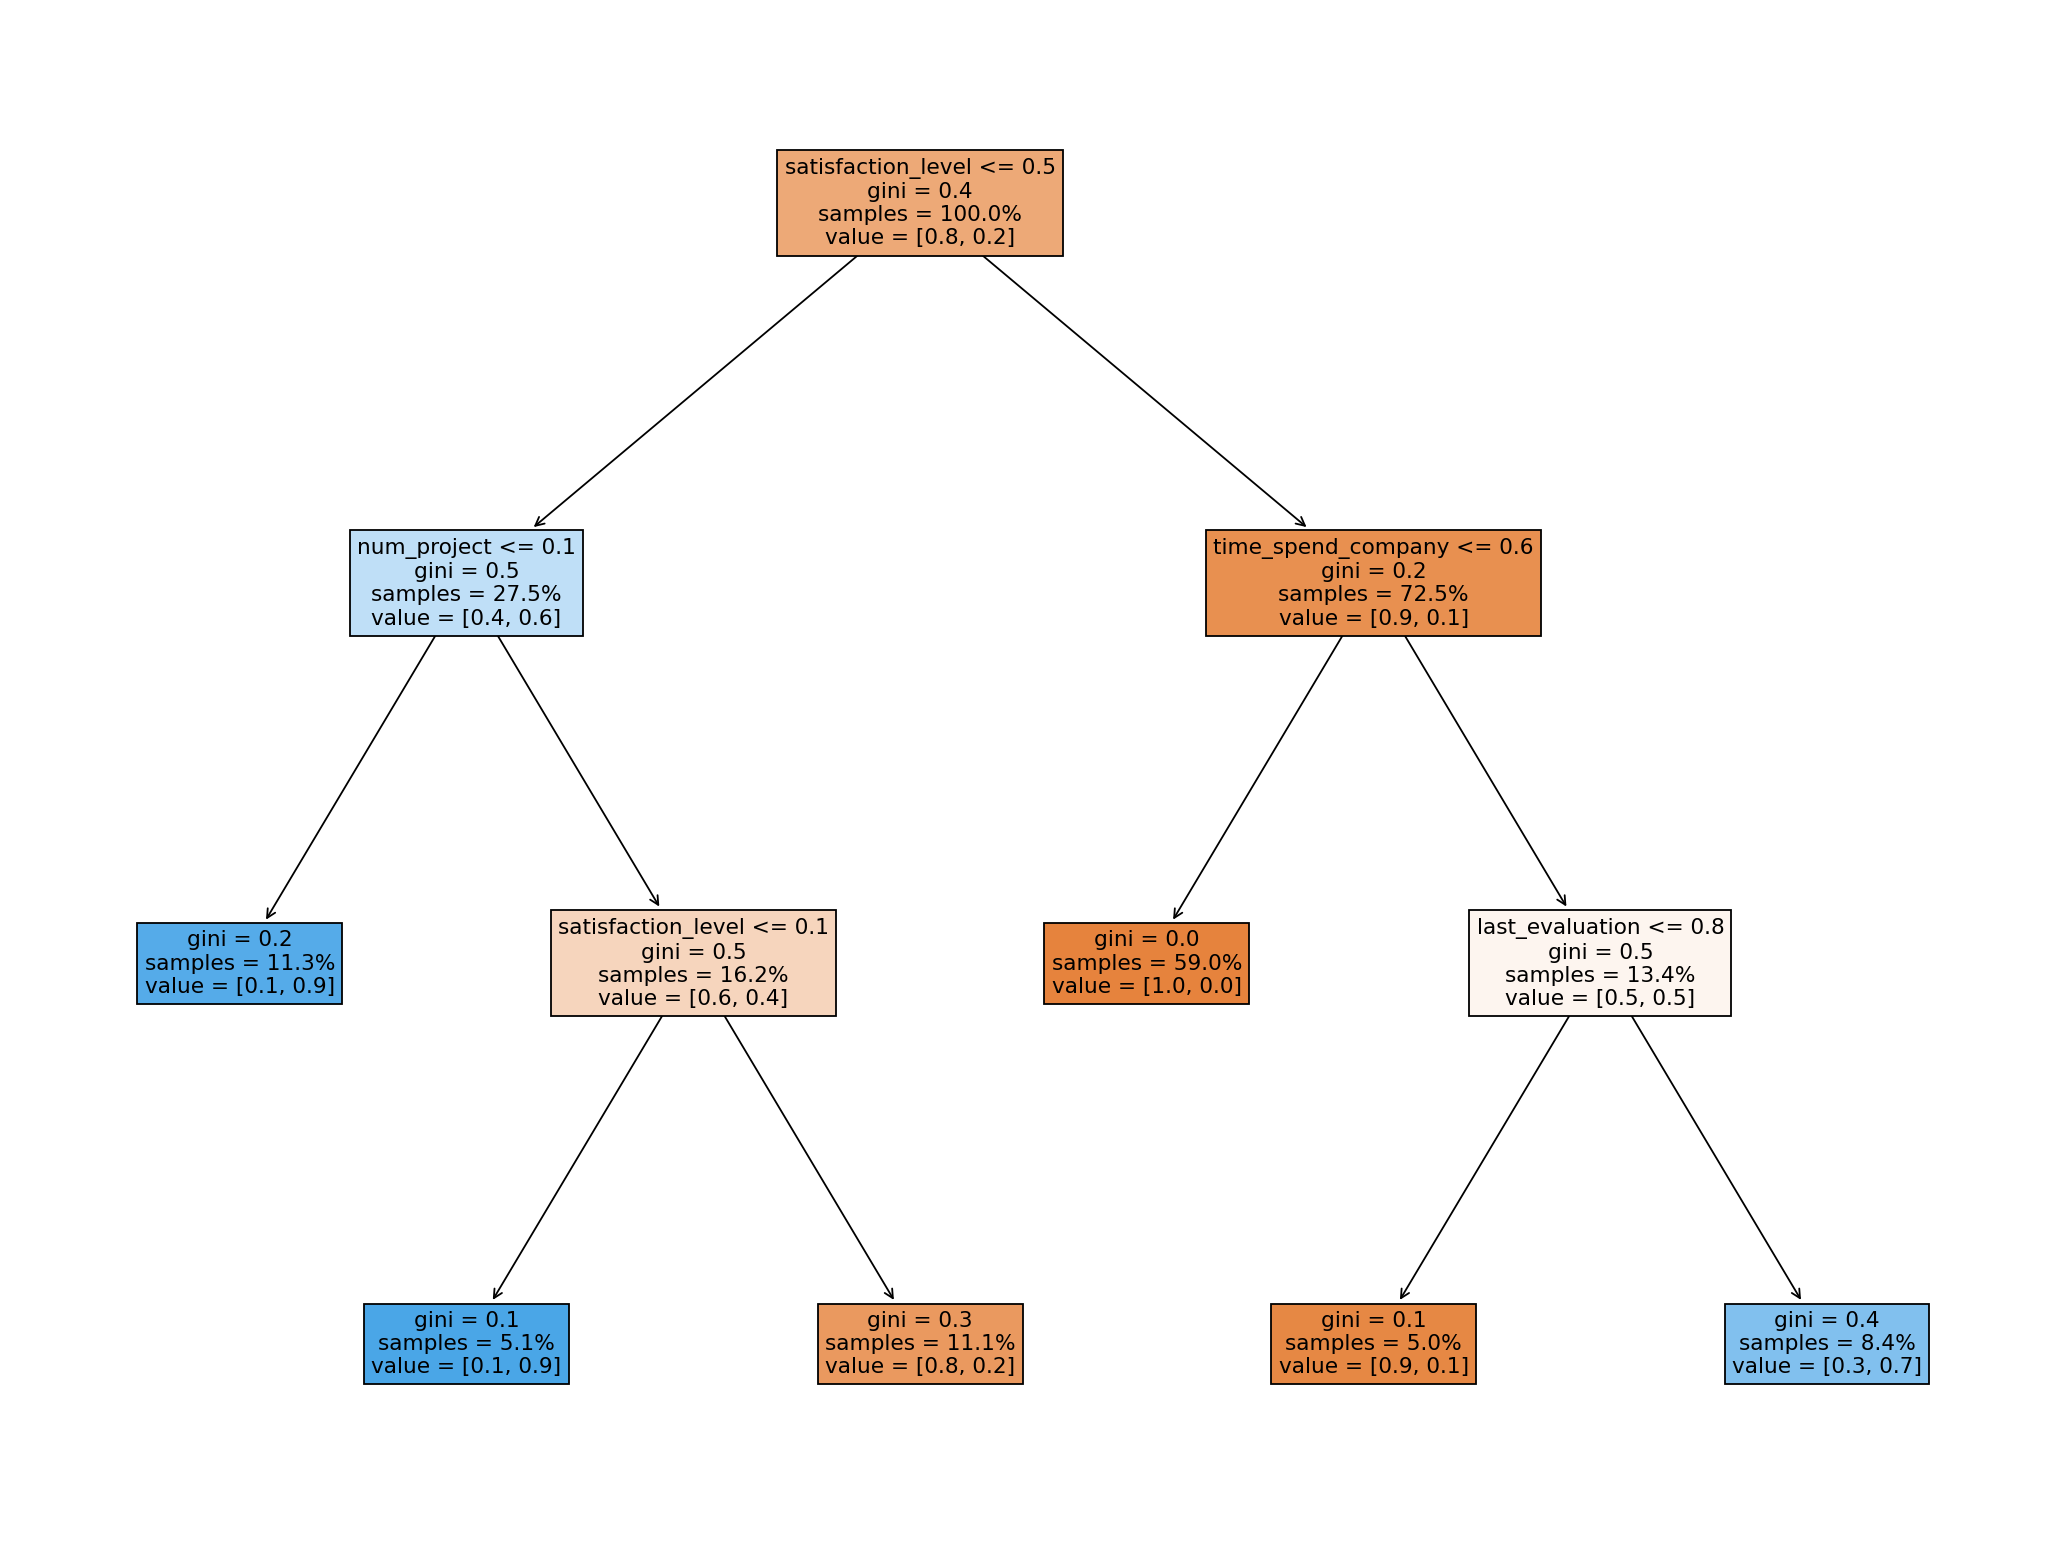

In [165]:
# criando o fig e o axes  - selecionando alguns niveis
fig, ax = plt.subplots(figsize=(16,12),dpi=130)
#criando o plot
plot_tree(classif, # a decision tree que será plotada
          feature_names = classif.feature_names_in_,
          ax=ax, # plotamos no axes criado do matplotlib
          precision=1, # precisão dos valores numéricos
          filled=True,
          max_depth=3, #  escolhemos a profundidade da árvore
          proportion = True, # retorna a proporção dos valores das amostras
          fontsize = 12 # mudar o tamanho da fonte
        )
#plotando o gráfico
plt.tight_layout();

## Regressão Logística

### Explicando o Algoritmo

-- Explicar o Algoritmo aqui

### Parâmetros


In [166]:
log_reg = LogisticRegression(
    ##penalty = None,
    solver = "newton-cg",
    random_state=13      
    )

log_reg_fit = log_reg.fit(X_train, y_train)

In [167]:
print(log_reg_fit.coef_)

[[-3.80978394  0.5499742   1.09939853  2.14044553 -1.52125897 -1.57510963
  -1.41950742 -0.3855158   0.16217772  0.47238564 -0.28198684  0.12291616
   0.09804239  0.13575334  0.25152915  0.32307648  1.97109662  1.38313546]]


### Resultados e Importâncias

In [168]:
## Checando a importância de cada coluna na regressão logística
df_features = pd.DataFrame(X_train.columns)

df_importances = pd.DataFrame(log_reg_fit.coef_).T

df_absImportance = df_importances.abs()

importance = pd.concat(
    [df_features, df_importances, df_absImportance ],
    axis =1
)


importance = importance.set_axis(['Feature', 'Importance', 'ABS Importance'], axis = 'columns').sort_values(by=['ABS Importance'], ascending=False)

importance

,Feature,Importance,ABS Importance
0,satisfaction_level,-3.809784,3.809784
3,time_spend_company,2.140446,2.140446
16,salary_low,1.971097,1.971097
5,promotion_last_5years,-1.575110,1.575110
4,Work_accident,-1.521259,1.521259
6,num_project,-1.419507,1.419507
17,salary_medium,1.383135,1.383135
2,average_montly_hours,1.099399,1.099399
1,last_evaluation,0.549974,0.549974
9,depto_hr,0.472386,0.472386


In [169]:
## Vemos aqui que o valor mais importante é 
# 1) nível de satisfação, que quanto maior, mais afasta o funcionário do left=1 (sair da empresa)
# 2) time_spend_company - quanto maior, mais chance do funcionario sair
# 3) classificação salário como baixo - maior chance de sair do que se o salário for alto ou médio

<Axes: xlabel='satisfaction_level', ylabel='left'>

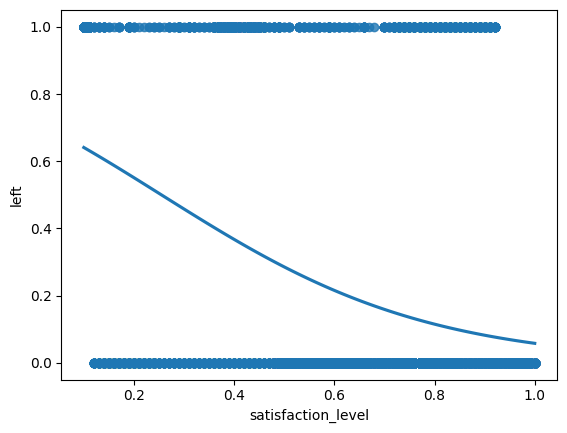

In [170]:
sb.regplot(x=df_train['satisfaction_level'], y=df_train['left'], data=df_train, logistic=True, ci=None)

### Acerto do Modelo e Matriz de Confusão


In [171]:
y_pred_log = log_reg_fit.predict(X_test.drop(['id'],axis=1))
y_pred_log

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [172]:
log_reg_fit.score(X_test.drop(['id'],axis=1), y_test)

0.7704444444444445

In [173]:
from sklearn.metrics import confusion_matrix
confusion_matrix_log_reg = confusion_matrix(y_test, y_pred_log)
confusion_matrix_log_reg

array([[3161,  280],
       [ 753,  306]], dtype=int64)

In [192]:
report_log_reg= classification_report(y_test, y_pred_log)
print(report_log_reg)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3441
           1       0.52      0.29      0.37      1059

    accuracy                           0.77      4500
   macro avg       0.66      0.60      0.62      4500
weighted avg       0.74      0.77      0.74      4500



<Axes: xlabel='satisfaction_level', ylabel='left'>

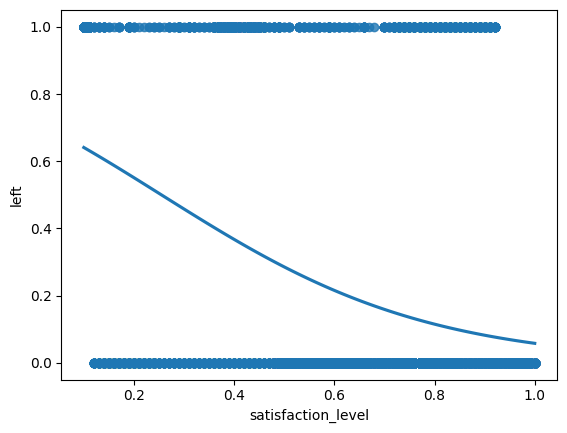

In [175]:
## o modelo entregou uma boa precisão para acertar quem não vai sair
## mas baixa precisão para quem vai sair (0.52)
## isso fica claro quando observamos que mesmo o melhor parâmetro para a regressão logística (satisfaction level) não entrega um 
## gráfico bem estruturado.
sb.regplot(x=df_train['satisfaction_level'], y=df_train['left'], data=df_train, logistic=True, ci=None)

## Random Forest Classifier

### Explicando o Algoritmo

### Parâmetros

In [176]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=1000, max_depth=3, n_jobs=-1,random_state=17)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=1000, n_jobs=-1,
                       random_state=17)

In [177]:
y_pred_randomforest = random_forest_model.predict(X_test.drop(['id'],axis=1))


### Resultados e Importâncias

In [178]:
df_features = pd.DataFrame(X_train.columns)

df_importances = pd.DataFrame(random_forest_model.feature_importances_)

importance = pd.concat(
    [df_features, df_importances],
    axis =1
)

importance = importance.set_axis(['Feature', 'Importance'], axis = 'columns').sort_values(by=['Importance'], ascending=False)

importance.head(10)

,Feature,Importance
0,satisfaction_level,0.367182
6,num_project,0.228105
3,time_spend_company,0.156384
2,average_montly_hours,0.135609
1,last_evaluation,0.072682
4,Work_accident,0.018893
16,salary_low,0.014054
17,salary_medium,0.002900
5,promotion_last_5years,0.001959
7,depto_RandD,0.000665


### Acerto do Modelo e Matriz de Confusão

In [179]:
confusion_matrix_RF = confusion_matrix(y_test, y_pred_randomforest)
confusion_matrix_RF

array([[3422,   19],
       [ 355,  704]], dtype=int64)

In [193]:
report_random_forest = classification_report(y_test, y_pred_randomforest)
print(report_random_forest)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3441
           1       0.97      0.66      0.79      1059

    accuracy                           0.92      4500
   macro avg       0.94      0.83      0.87      4500
weighted avg       0.92      0.92      0.91      4500



In [181]:
# A precisão do modelo é alta, ou seja, é altíssima a chance de "pegar" alguém que está com tendência de sair
# porém o valor do recall não é tão alto, ou seja, poderemos identificar "falsos positivos"

## Gradient Boosting

### Explicando o Algoritmo

In [182]:
### Explicar algoritmo aqui

### Parâmetros

In [242]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost = GradientBoostingClassifier(
    n_estimators = 100,                 ## alto número de estimators
    random_state=13,
    min_weight_fraction_leaf=0.05,      ## evitamos folhas e nós muito específicos
    min_impurity_decrease=0.01,         ## mesmo motivo acima
    max_depth=3                         ## para evitar overfitting

)

gradient_boost_fit = gradient_boost.fit(X_train, y_train)

### Resultados e Importâncias

In [243]:
df_features = pd.DataFrame(X_train.columns)

df_importances = pd.DataFrame(gradient_boost_fit.feature_importances_)

importance = pd.concat(
    [df_features, df_importances],
    axis =1
)

importance = importance.set_axis(['Feature', 'Importance'], axis = 'columns').sort_values(by=['Importance'], ascending=False)

importance.head(10)

,Feature,Importance
0,satisfaction_level,0.422084
3,time_spend_company,0.220764
6,num_project,0.165780
1,last_evaluation,0.101763
2,average_montly_hours,0.082560
16,salary_low,0.003179
4,Work_accident,0.002460
17,salary_medium,0.000561
15,depto_technical,0.000500
14,depto_support,0.000200


### Acerto do Modelo e Matriz de Confusão

In [244]:
y_pred_grad_boost = gradient_boost_fit.predict(X_test.drop(['id'],axis=1))

confusion_matrix(y_test, y_pred_grad_boost)

array([[3375,   66],
       [  89,  970]], dtype=int64)

In [245]:
report_gradient_boosting = classification_report(y_test, y_pred_grad_boost)
print(report_gradient_boosting)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3441
           1       0.94      0.92      0.93      1059

    accuracy                           0.97      4500
   macro avg       0.96      0.95      0.95      4500
weighted avg       0.97      0.97      0.97      4500



## Comparando os modelos

In [248]:
print("Arvore de decisão")
print(report_tree)

Arvore de decisão
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7981
           1       0.84      0.87      0.85      2519

    accuracy                           0.93     10500
   macro avg       0.90      0.91      0.90     10500
weighted avg       0.93      0.93      0.93     10500



In [249]:
print('Regressão Logística')
print(report_log_reg)

Regressão Logística
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3441
           1       0.52      0.29      0.37      1059

    accuracy                           0.77      4500
   macro avg       0.66      0.60      0.62      4500
weighted avg       0.74      0.77      0.74      4500



In [250]:
print('Random Forest Classifier')
print(report_random_forest)

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3441
           1       0.97      0.66      0.79      1059

    accuracy                           0.92      4500
   macro avg       0.94      0.83      0.87      4500
weighted avg       0.92      0.92      0.91      4500



In [251]:
print("Gradient Boosting")
print(report_gradient_boosting)

Gradient Boosting
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3441
           1       0.94      0.92      0.93      1059

    accuracy                           0.97      4500
   macro avg       0.96      0.95      0.95      4500
weighted avg       0.97      0.97      0.97      4500



In [252]:
#Baseado no que podemos observar acima, cremos que o melhor modelo desenvolvido é o Gradient Boosting.
#O modelo possui altos valores de precisão e recall, mesmo com os cuidados que tivemos nos hiperparametros para evitar overfitting

# Questão 5
Utilize a base se dados HR_Abandono2022 selecionando somente as variáveis numéricas quantitativas crie segmentos de funcionários. Para cada resposta deixar a saída do programa.

- Análise descritiva dessa base com foco no objetivo. Lembre-se de verificar se tem outliers. Indique os critérios de eliminação de outliers, se necessário.
- Porque é necessário fazer a padronização das variáveis segmentadoras. Coloque a sumarização das variáveis padronizadas. 
- Qual a quantidade de clusters indicado pelo método de Elbow e com o Método Hierárquico
- Utilizando o Método K-Means, qual a quantidade e percentual funcionários em cada cluster
- Qual o centróide dos clusters.   
- Como vcs interpretariam cada cluster. Descrever as características de cada cluster. 
- A partir dos clusters criados volte na base inicial de funcionários e traga a informação se ele está ativo ou está desligado. Faça um cruzamento do cluster com a penetração de funcionários que já saíram da empresa (left=1). Quais análises ou considerações vocês podem tirar daqui.  

